In [ ]:
#title
#colourful
#inference
# pd.detect_bias()
#wordcloud
#textblob with subjectivity

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
text = pd.read_csv('/content/clean_data.csv')
text

,Unnamed: 0,ID,text,clean_text
0,0,57,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...
1,1,1603,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...
2,2,755,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...
3,3,1636,The water you drink now-a-days is not safe .,water drink nowadays safe
4,4,828,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo
...,...,...,...,...
1995,1995,222,But her agriculture is underdeveloped and prod...,her agriculture underdeveloped productivity low
1996,1996,926,Teacher : A teacher helps his students with hi...,teacher teacher help his student his teaching ...
1997,1997,490,She should take steps to fulfill demands of fa...,she step fulfill demand family scarce resource
1998,1998,1293,Look carefully at how the tendon joins the mus...,carefully tendon join muscle


In [ ]:
from wordcloud import WordCloud
stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "hed", "hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't",  "shed", "shes", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

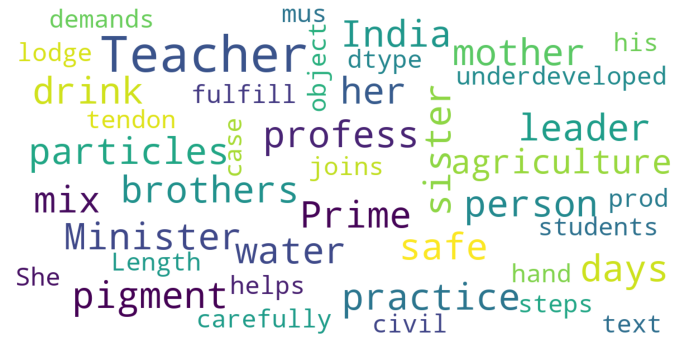

In [ ]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(text['text'])

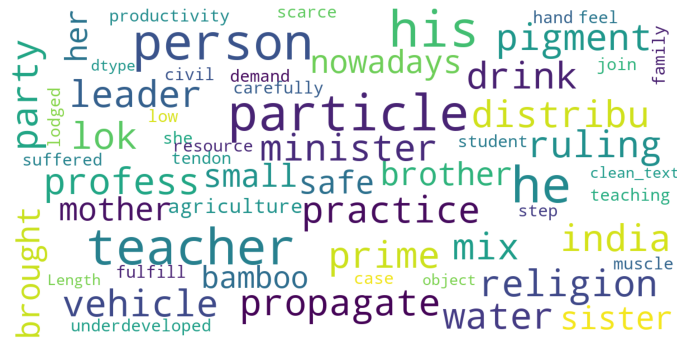

In [ ]:
show_wordcloud(text['clean_text'])

In [ ]:
df0 = pd.DataFrame(columns = ['index', 'text', 'clean_text', 'label'])
df0

,index,text,clean_text,label


In [ ]:
df = pd.read_csv('/content/classified.csv')
df

,Unnamed: 0,index,text,clean_text,label
0,0,501,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...,1
1,1,1784,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...,0
2,2,1625,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...,1
3,3,661,The water you drink now-a-days is not safe .,water drink nowadays safe,1
4,4,1675,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo,1
...,...,...,...,...,...
1042,1042,1895,Fill in the requirements of photosynthesis in ...,requirement photosynthesis block left type ene...,1
1043,1043,1901,Sources : The one who constructs history is an...,source construct history historian,1
1044,1044,1975,In the court of Murshidabad we see a different...,court murshidabad trend defeating sirajuddaula...,1
1045,1045,1981,You have a tractor in front of your house and ...,tractor house thought discussing,1


In [ ]:
for i in range (0, 1046):
  if df.loc[i].at['label'] == 0:
    df0.loc[df.index[i]] = df.iloc[i]

In [ ]:
df0

,index,text,clean_text,label
1,1784,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...,0
5,1434,School textbooks glorified the French and just...,school textbook glorified french justified col...,0
8,1916,But the average percentage of oxygen and silic...,average percentage oxygen silicon rock,0
10,1460,Through the years men developed a variety of t...,year men developed variety textile material br...,0
12,1774,The runner should keep his neck and face relax...,runner his neck face relaxed running,0
...,...,...,...,...
899,304,Boojho wants to know how the male gamete in th...,boojho male gamete pollen grain reach female g...,0
911,736,If an athelete found drugged during the compet...,athelete drugged competition he allowed partic...,0
920,786,The common man of the Third Estate bears the F...,common man estate bear estate french middle cl...,0
923,416,From the very ancient periods men used to appl...,ancient period men apply ointment face special...,0


In [ ]:
df1 = pd.DataFrame(columns = ['index', 'text', 'clean_text', 'label'])
df1

,index,text,clean_text,label


In [ ]:
for i in range (0, 1046):
  if df.loc[i].at['label'] == 1:
    df1.loc[df.index[i]] = df.iloc[i]

In [ ]:
df1

,index,text,clean_text,label
0,501,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...,1
2,1625,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...,1
3,661,The water you drink now-a-days is not safe .,water drink nowadays safe,1
4,1675,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo,1
6,627,"Jordan has got roads , railways and airways .",jordan road railway airway,1
...,...,...,...,...
1041,1849,Shab - e - Qadr is one of the festivals of Mus...,shab qadr festival muslim,1
1042,1895,Fill in the requirements of photosynthesis in ...,requirement photosynthesis block left type ene...,1
1043,1901,Sources : The one who constructs history is an...,source construct history historian,1
1044,1975,In the court of Murshidabad we see a different...,court murshidabad trend defeating sirajuddaula...,1


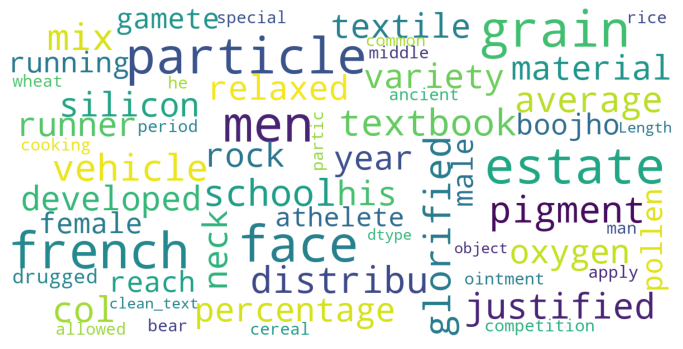

In [ ]:
show_wordcloud(df0['clean_text'])


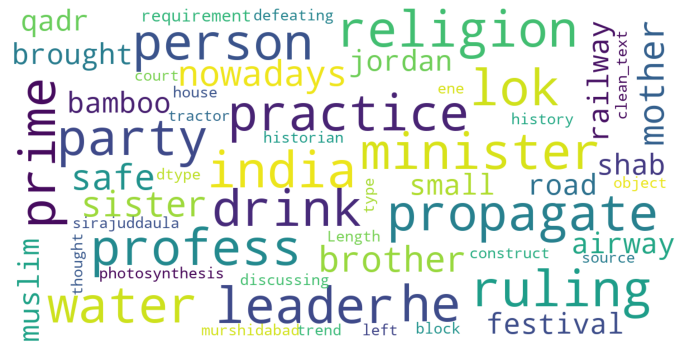

In [ ]:
show_wordcloud(df1['clean_text'])

In [ ]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [ ]:
text['subjectivity'] = ''
df0['subjectivity'] = ''
df1['subjectivity'] = ''

In [ ]:
TextBlob('100 people killed in Iraq').sentiment.subjectivity
subj_list = []

In [ ]:
for i in range (0, 2000):
  subj_list.append(TextBlob(text.loc[i].at['text']).sentiment.subjectivity)

In [ ]:
text['subjectivity'] = subj_list
text

,Unnamed: 0,ID,text,clean_text,subjectivity
0,0,57,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...,0.473254
1,1,1603,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...,0.383333
2,2,755,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...,0.600000
3,3,1636,The water you drink now-a-days is not safe .,water drink nowadays safe,0.500000
4,4,828,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo,0.400000
...,...,...,...,...,...
1995,1995,222,But her agriculture is underdeveloped and prod...,her agriculture underdeveloped productivity low,0.300000
1996,1996,926,Teacher : A teacher helps his students with hi...,teacher teacher help his student his teaching ...,0.350000
1997,1997,490,She should take steps to fulfill demands of fa...,she step fulfill demand family scarce resource,0.000000
1998,1998,1293,Look carefully at how the tendon joins the mus...,carefully tendon join muscle,1.000000


In [ ]:
df0 = df0.reset_index()

In [ ]:
df0

,level_0,index,text,clean_text,label,subjectivity
0,1,1784,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...,0,
1,5,1434,School textbooks glorified the French and just...,school textbook glorified french justified col...,0,
2,8,1916,But the average percentage of oxygen and silic...,average percentage oxygen silicon rock,0,
3,10,1460,Through the years men developed a variety of t...,year men developed variety textile material br...,0,
4,12,1774,The runner should keep his neck and face relax...,runner his neck face relaxed running,0,
...,...,...,...,...,...,...
302,899,304,Boojho wants to know how the male gamete in th...,boojho male gamete pollen grain reach female g...,0,
303,911,736,If an athelete found drugged during the compet...,athelete drugged competition he allowed partic...,0,
304,920,786,The common man of the Third Estate bears the F...,common man estate bear estate french middle cl...,0,
305,923,416,From the very ancient periods men used to appl...,ancient period men apply ointment face special...,0,


In [ ]:
df1 = df1.reset_index()
df1

,level_0,index,text,clean_text,label,subjectivity
0,0,501,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...,1,
1,2,1625,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...,1,
2,3,661,The water you drink now-a-days is not safe .,water drink nowadays safe,1,
3,4,1675,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo,1,
4,6,627,"Jordan has got roads , railways and airways .",jordan road railway airway,1,
...,...,...,...,...,...,...
734,1041,1849,Shab - e - Qadr is one of the festivals of Mus...,shab qadr festival muslim,1,
735,1042,1895,Fill in the requirements of photosynthesis in ...,requirement photosynthesis block left type ene...,1,
736,1043,1901,Sources : The one who constructs history is an...,source construct history historian,1,
737,1044,1975,In the court of Murshidabad we see a different...,court murshidabad trend defeating sirajuddaula...,1,


In [ ]:
subj_list = []
for i in range (0, 307):
  subj_list.append(TextBlob(df0.loc[i].at['text']).sentiment.subjectivity)
df0['subjectivity'] = subj_list
df0

,level_0,index,text,clean_text,label,subjectivity
0,1,1784,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...,0,0.383333
1,5,1434,School textbooks glorified the French and just...,school textbook glorified french justified col...,0,0.483333
2,8,1916,But the average percentage of oxygen and silic...,average percentage oxygen silicon rock,0,0.400000
3,10,1460,Through the years men developed a variety of t...,year men developed variety textile material br...,0,0.377273
4,12,1774,The runner should keep his neck and face relax...,runner his neck face relaxed running,0,0.000000
...,...,...,...,...,...,...
302,899,304,Boojho wants to know how the male gamete in th...,boojho male gamete pollen grain reach female g...,0,0.091667
303,911,736,If an athelete found drugged during the compet...,athelete drugged competition he allowed partic...,0,0.000000
304,920,786,The common man of the Third Estate bears the F...,common man estate bear estate french middle cl...,0,0.138889
305,923,416,From the very ancient periods men used to appl...,ancient period men apply ointment face special...,0,0.603571


In [ ]:
subj_list = []
for i in range (0, 739):
  subj_list.append(TextBlob(df1.loc[i].at['text']).sentiment.subjectivity)
df1['subjectivity'] = subj_list
df1

,level_0,index,text,clean_text,label,subjectivity
0,0,501,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...,1,0.473254
1,2,1625,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...,1,0.600000
2,3,661,The water you drink now-a-days is not safe .,water drink nowadays safe,1,0.500000
3,4,1675,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo,1,0.400000
4,6,627,"Jordan has got roads , railways and airways .",jordan road railway airway,1,0.000000
...,...,...,...,...,...,...
734,1041,1849,Shab - e - Qadr is one of the festivals of Mus...,shab qadr festival muslim,1,0.000000
735,1042,1895,Fill in the requirements of photosynthesis in ...,requirement photosynthesis block left type ene...,1,0.000000
736,1043,1901,Sources : The one who constructs history is an...,source construct history historian,1,0.000000
737,1044,1975,In the court of Murshidabad we see a different...,court murshidabad trend defeating sirajuddaula...,1,0.375641


Text(0.5, 0, 'subjectivity values')

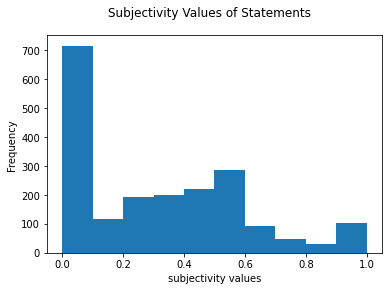

In [ ]:
# text['subjectivity'].hist()
text['subjectivity'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Subjectivity Values of Statements')
plt.xlabel('subjectivity values')

Text(0.5, 0, 'subjectivity values')

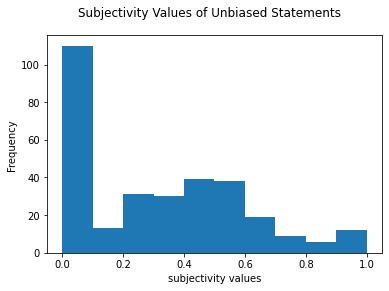

In [ ]:
# df0['subjectivity'].hist()
df0['subjectivity'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Subjectivity Values of Unbiased Statements')
plt.xlabel('subjectivity values')

Text(0.5, 0, 'subjectivity values')

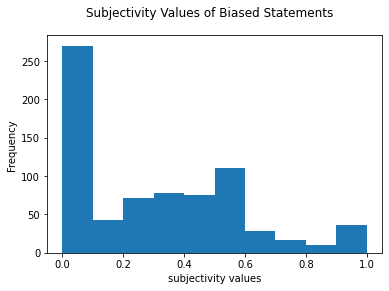

In [ ]:
# df1['subjectivity'].hist()
df1['subjectivity'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Subjectivity Values of Biased Statements')
plt.xlabel('subjectivity values')

In [ ]:
prop_list = []
for i in range (0, 2000):
  if(text.loc[i].at['subjectivity']==0):
   prop_list.append('fact')
  else:
    prop_list.append('opinion')
text['property'] = prop_list
text

,Unnamed: 0,ID,text,clean_text,subjectivity,property
0,0,57,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...,0.473254,opinion
1,1,1603,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...,0.383333,opinion
2,2,755,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...,0.600000,opinion
3,3,1636,The water you drink now-a-days is not safe .,water drink nowadays safe,0.500000,opinion
4,4,828,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo,0.400000,opinion
...,...,...,...,...,...,...
1995,1995,222,But her agriculture is underdeveloped and prod...,her agriculture underdeveloped productivity low,0.300000,opinion
1996,1996,926,Teacher : A teacher helps his students with hi...,teacher teacher help his student his teaching ...,0.350000,opinion
1997,1997,490,She should take steps to fulfill demands of fa...,she step fulfill demand family scarce resource,0.000000,fact
1998,1998,1293,Look carefully at how the tendon joins the mus...,carefully tendon join muscle,1.000000,opinion


Text(0.5, 1.0, 'Frequency of Opinions and Facts of All Statements')

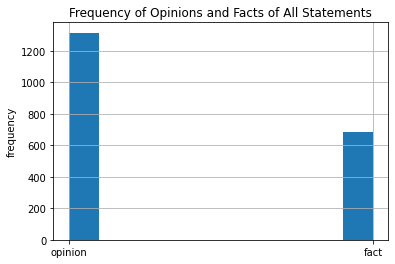

In [ ]:
text['property'].hist()

plt.ylabel('frequency')
plt.title('Frequency of Opinions and Facts of All Statements')

In [ ]:
prop_list = []
for i in range (0, 307):
  if(df0.loc[i].at['subjectivity']==0):
   prop_list.append('fact')
  else:
    prop_list.append('opinion')
df0['property'] = prop_list
df0

,level_0,index,text,clean_text,label,subjectivity,property
0,1,1784,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...,0,0.383333,opinion
1,5,1434,School textbooks glorified the French and just...,school textbook glorified french justified col...,0,0.483333,opinion
2,8,1916,But the average percentage of oxygen and silic...,average percentage oxygen silicon rock,0,0.400000,opinion
3,10,1460,Through the years men developed a variety of t...,year men developed variety textile material br...,0,0.377273,opinion
4,12,1774,The runner should keep his neck and face relax...,runner his neck face relaxed running,0,0.000000,fact
...,...,...,...,...,...,...,...
302,899,304,Boojho wants to know how the male gamete in th...,boojho male gamete pollen grain reach female g...,0,0.091667,opinion
303,911,736,If an athelete found drugged during the compet...,athelete drugged competition he allowed partic...,0,0.000000,fact
304,920,786,The common man of the Third Estate bears the F...,common man estate bear estate french middle cl...,0,0.138889,opinion
305,923,416,From the very ancient periods men used to appl...,ancient period men apply ointment face special...,0,0.603571,opinion


Text(0.5, 1.0, 'Frequency of Opinions and Facts for Unbiased Statements')

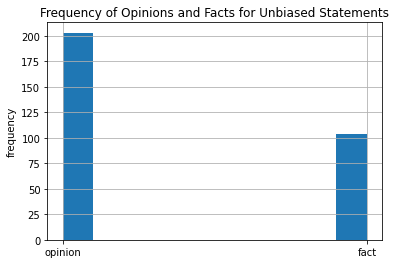

In [ ]:
df0['property'].hist()
plt.ylabel('frequency')
plt.title('Frequency of Opinions and Facts for Unbiased Statements')

In [ ]:
prop_list = []
for i in range (0, 739):
  if(df1.loc[i].at['subjectivity']==0):
   prop_list.append('fact')
  else:
    prop_list.append('opinion')
df1['property'] = prop_list
df1

,level_0,index,text,clean_text,label,subjectivity,property
0,0,501,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...,1,0.473254,opinion
1,2,1625,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...,1,0.600000,opinion
2,3,661,The water you drink now-a-days is not safe .,water drink nowadays safe,1,0.500000,opinion
3,4,1675,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo,1,0.400000,opinion
4,6,627,"Jordan has got roads , railways and airways .",jordan road railway airway,1,0.000000,fact
...,...,...,...,...,...,...,...
734,1041,1849,Shab - e - Qadr is one of the festivals of Mus...,shab qadr festival muslim,1,0.000000,fact
735,1042,1895,Fill in the requirements of photosynthesis in ...,requirement photosynthesis block left type ene...,1,0.000000,fact
736,1043,1901,Sources : The one who constructs history is an...,source construct history historian,1,0.000000,fact
737,1044,1975,In the court of Murshidabad we see a different...,court murshidabad trend defeating sirajuddaula...,1,0.375641,opinion


Text(0.5, 1.0, 'Frequency of Opinions and Facts for Biased Statements')

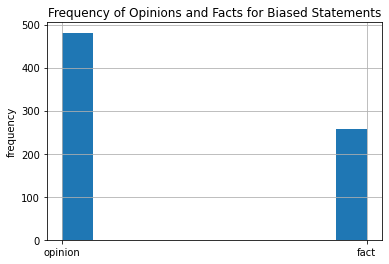

In [ ]:
# df1['property'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Number of Opinions and Facts in Biased Statements')
df1['property'].hist()
plt.ylabel('frequency')
plt.title('Frequency of Opinions and Facts for Biased Statements')